# YOLO Object Detection - Phase 2





#### AbdelHakim Saeed 16P6041

## Importing Libraries

In [1]:
import numpy as np
import time 
import cv2
import os 
import glob
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

## Load Yolo Weights/ CFG 

In [2]:
weights_path = os.path.join("Project_data","yolov3.weights")
Cfg_Path = os.path.join("Project_data","yolov3.cfg")
labels_path = os.path.join("Project_data","coco.names")
labels=open(labels_path).read().strip().split("\n")

## Load Neural Net 

In [3]:
net =cv2.dnn.readNetFromDarknet(Cfg_Path,weights_path)

## Show Layers Names

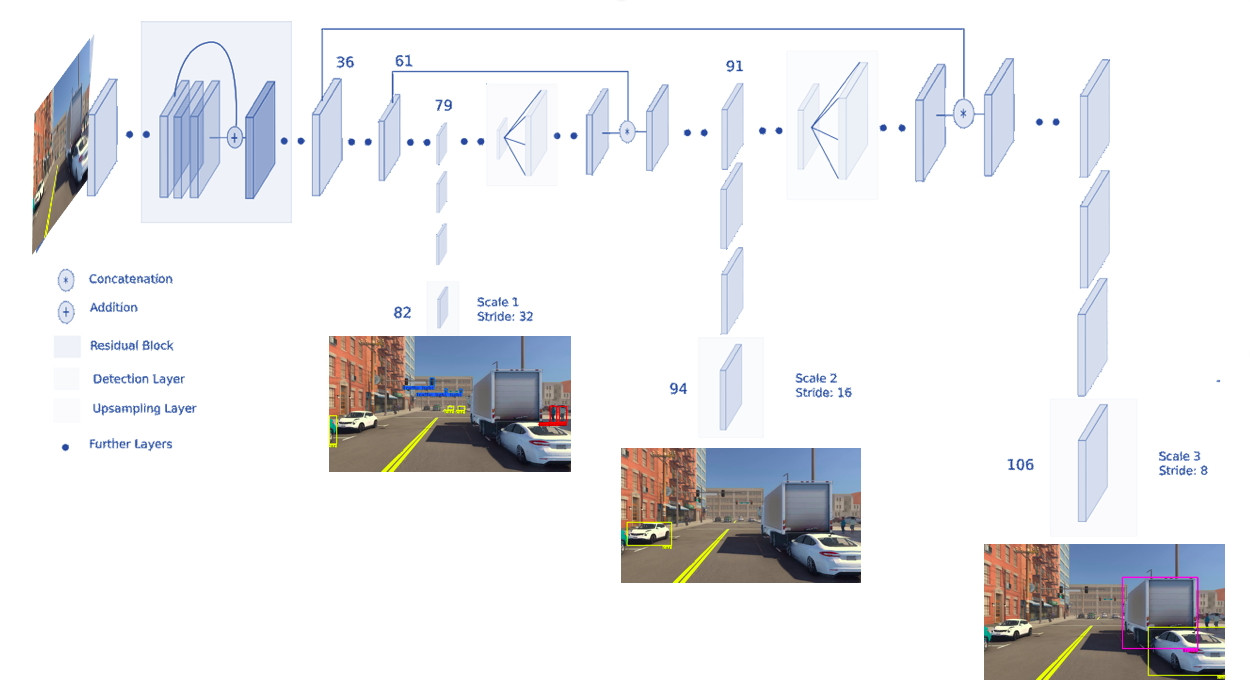

In [4]:
names = net.getLayerNames()

In [5]:
names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [6]:
##img_path = os.path.join("yolo","test_img.png")

##img = cv2.imread(img_path)
##img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [7]:
##plt.imshow(img)

In [8]:
##Height , Width =img.shape[:2]


In [9]:
layers_names = [names[i - 1] for i in net.getUnconnectedOutLayers()]

In [10]:
layers_names

['yolo_82', 'yolo_94', 'yolo_106']

# Repeat from Here for a video

In [11]:
def YOLODETECT(img):
    Height, Width =img.shape[:2]
    blob = cv2.dnn.blobFromImage(img,1/255.0,(416,416),crop = False, swapRB = False)
    net.setInput(blob)
    layers_output=net.forward(layers_names)
    boxes=[]
    confidences=[]
    classIDs=[]
    for output in layers_output:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence= scores[classID]
        
            if confidence>0.85:
                box = detection[:4] *np.array([Width,Height,Width,Height])
                bx,by,bw,bh=box.astype("int")
            
                x=int(bx-(bw/2))
                y=int(by-(bh/2))
            
                boxes.append([x,y,int(bw),int(bh)])
                confidences.append(float(confidence))
                classIDs.append(classID)
                
                            
    idxs=cv2.dnn.NMSBoxes(boxes,confidences,0.8,0.8) 
    result=img
    if len(idxs) > 0:
        for i in idxs.flatten():
            (x,y)=[boxes[i][0],boxes[i][1]]
            (w,h)=[boxes[i][2],boxes[i][3]]
    
            result=cv2.rectangle(img,(x,y),(x+w,y+h),(0,150,150),2)
            result=cv2.putText(img,"{}: {}".format(labels[classIDs[i]],confidences[i]),(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,150,150),2)
            
    return result

In [12]:
Output_video = 'object_tracked.mp4'
Input_video = 'Project_data/challenge_video.mp4'

clip1 = VideoFileClip(Input_video)
print(clip1.get_frame(0).shape)
video_clip = clip1.fl_image(YOLODETECT) # This function expects color images
video_clip.write_videofile(Output_video, audio=False)

(720, 1280, 3)


t:   0%|          | 0/485 [00:00<?, ?it/s, now=None]

Moviepy - Building video object_tracked.mp4.
Moviepy - Writing video object_tracked.mp4



Moviepy - Done !
Moviepy - video ready object_tracked.mp4


In [ ]:
labels